<a href="https://colab.research.google.com/github/deshanahan/DATA-602-Homework/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

wine = load_wine()

print('Feature Names:\n')
for feature in wine.feature_names:
  print(feature)

Feature Names:

alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline


In [2]:
data = wine.data
features = wine.feature_names
target = wine.target
target_names = wine.target_names
X = pd.DataFrame(data, columns=features)
y = pd.Categorical.from_codes(target, target_names)
print(X.shape)
X.head(5)

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
wine_df = X.join(pd.Series(y, name='class'))
class_feature_means = pd.DataFrame(columns=target_names)
for c, rows in wine_df.groupby('class'):
  class_feature_means[c] = rows.mean()
class_feature_means

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
cov_mat = np.cov(X_train.T)
values, vectors = np.linalg.eig(cov_mat)

print('Eigenvalues:')
for value in values:
  print(value)

Eigenvalues:
4.682722770472998
2.517493700893584
1.4425112439605576
0.9502568705615341
0.9138815593826501
0.7000276683878084
0.5969680163040222
0.0954481565439253
0.14241154031474426
0.31659154675215184
0.22087117162328035
0.2674107558413066
0.2590960558720119


In [7]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
individual_explained_variance  = pca.explained_variance_ratio_


print(f'individual explained variances:\n{individual_explained_variance}\n')
cumulative_explained_variance = np.cumsum(individual_explained_variance)
print(f'cumulative explained variance:\n{cumulative_explained_variance}')

individual explained variances:
[0.35730453 0.19209164 0.11006755 0.07250719 0.06973166 0.05341402
 0.04555029 0.0241568  0.02040417 0.01976974 0.01685307 0.01086639
 0.00728295]

cumulative explained variance:
[0.35730453 0.54939617 0.65946372 0.73197091 0.80170257 0.85511659
 0.90066688 0.92482368 0.94522785 0.96499758 0.98185066 0.99271705
 1.        ]


The plot shows that over 50% of the variance can be explained by the first two eigenvalues and over 90% of the variance is explained by the first 7 eigenvalues.

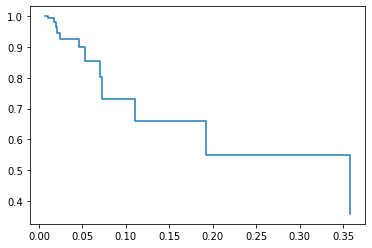

In [8]:
from matplotlib.pyplot import step as splt
splt(individual_explained_variance, cumulative_explained_variance)

In [12]:
print(vectors)
pairs = [(np.abs(values[i]), vectors[:,i]) for i in range(len(values))]
pairs = sorted(pairs, key=lambda tup: tup[0], reverse=True)
print(pairs)

[[ 0.15763477 -0.49414675 -0.13550025  0.22002101  0.1001375  -0.20436914
  -0.00578955 -0.04666841  0.29868842 -0.56269774 -0.17889091 -0.38924236
  -0.14436028]
 [-0.25237011 -0.1670862   0.08484512 -0.34863385  0.51191077 -0.36452972
  -0.51124855 -0.03381991 -0.22155089 -0.06054546  0.17580919  0.11403549
  -0.15978215]
 [-0.01662626 -0.33581955  0.61436922  0.21029079 -0.10967198 -0.18888033
   0.0707048  -0.17376559 -0.02928534  0.18377711 -0.44222618  0.37290998
  -0.11455204]
 [-0.23514225  0.0230456   0.62199483 -0.11850515 -0.01880619 -0.03226373
   0.34711322  0.16492916  0.04198251 -0.3281213   0.44478733 -0.19926928
   0.21726025]
 [ 0.14285062 -0.2816766   0.08744449 -0.54616385 -0.60714326 -0.03967105
  -0.24673831  0.08350982 -0.03735091  0.19114731 -0.02153713 -0.33780751
  -0.06123678]
 [ 0.38989121 -0.07164769  0.18025489  0.01134185  0.28882326  0.11967975
   0.07105096 -0.43422256  0.29276883  0.41903011  0.3903896  -0.21570778
  -0.24219349]
 [ 0.42596901 -0.00569

In [16]:
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real
print(w_matrix)

[[ 0.15763477 -0.49414675]
 [-0.25237011 -0.1670862 ]
 [-0.01662626 -0.33581955]
 [-0.23514225  0.0230456 ]
 [ 0.14285062 -0.2816766 ]
 [ 0.38989121 -0.07164769]
 [ 0.42596901 -0.00569565]
 [-0.28675917 -0.04855187]
 [ 0.30864294 -0.00589032]
 [-0.08886736 -0.52633004]
 [ 0.30119689  0.28399523]
 [ 0.37783572  0.18136641]
 [ 0.28836287 -0.3703045 ]]


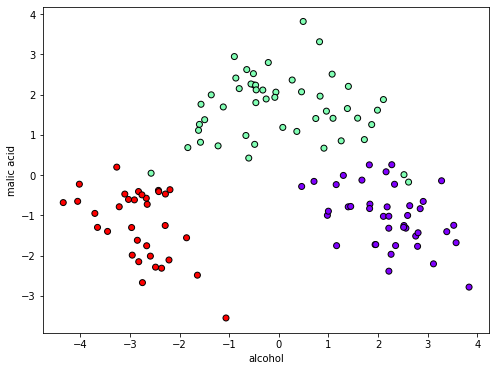

In [21]:
X = X_train.dot(w_matrix)
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y_train)
plt.figure(2, figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolors='k')
plt.xlabel('alcohol')
plt.ylabel('malic acid')
plt.show()


In [23]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
logistic_regr = LogisticRegression(solver = 'lbfgs')
logistic_regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
logistic_regr.predict(X_test[0].reshape(1,-1))

array(['class_0'], dtype=object)

In [27]:
logistic_regr.predict(X_test[0:10])

array(['class_0', 'class_1', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_2', 'class_1', 'class_1', 'class_2'], dtype=object)

In [28]:
print('Accuracy Score: %0.2f' % logistic_regr.score(X_test, y_test))

Accuracy Score: 0.98
